# Polynomial Regression

## Importing the libraries

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [10]:
dataset = pd.read_csv('Position_Salaries.csv')
#Ignore the First Col ("Position" Col) since we already encoded it to "Level" Column
X = dataset.iloc[:, 1:-1].values 
y = dataset.iloc[:, -1].values
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])

## Training the Linear Regression model on the whole dataset
WHOLE DATASET : Since we dont want split as to miss Salary Data in All Levels

In [11]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

## Training the Polynomial Regression model on the whole dataset

In [12]:
from sklearn.preprocessing import PolynomialFeatures
#y = b0 + b1*x1 + b2*x1^2 + b3*x1^3 + b4*x1^4
poly_reg = PolynomialFeatures(degree = 4) # n = 4
X_poly = poly_reg.fit_transform(X)
X_poly #convert X to 1, x1, x1^2

array([[1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00],
       [1.000e+00, 2.000e+00, 4.000e+00, 8.000e+00, 1.600e+01],
       [1.000e+00, 3.000e+00, 9.000e+00, 2.700e+01, 8.100e+01],
       [1.000e+00, 4.000e+00, 1.600e+01, 6.400e+01, 2.560e+02],
       [1.000e+00, 5.000e+00, 2.500e+01, 1.250e+02, 6.250e+02],
       [1.000e+00, 6.000e+00, 3.600e+01, 2.160e+02, 1.296e+03],
       [1.000e+00, 7.000e+00, 4.900e+01, 3.430e+02, 2.401e+03],
       [1.000e+00, 8.000e+00, 6.400e+01, 5.120e+02, 4.096e+03],
       [1.000e+00, 9.000e+00, 8.100e+01, 7.290e+02, 6.561e+03],
       [1.000e+00, 1.000e+01, 1.000e+02, 1.000e+03, 1.000e+04]])

In [13]:
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)

LinearRegression()

## Visualising the Linear Regression results

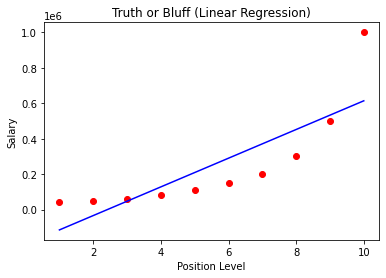

In [14]:
plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg.predict(X), color = 'blue')
plt.title('Truth or Bluff (Linear Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

From the chart, we can see that Linear Regression Model does not fit well with this data

## Visualising the Polynomial Regression results

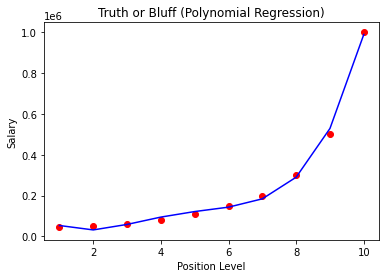

In [15]:
plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg_2.predict(X_poly), color = 'blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

## Visualising the Polynomial Regression results (for higher resolution and smoother curve)

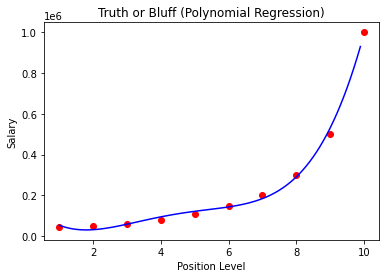

In [20]:
X_grid = np.arange(min(X), max(X), 0.1) #Row array from min(X) to max(X)
X_grid = X_grid.reshape((len(X_grid), 1)) #Convert Row Array to Column Array
plt.scatter(X,y, color='red')
plt.plot(X_grid, lin_reg_2.predict(poly_reg.fit_transform(X_grid)), color = 'blue') 
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

## Predicting a new result with Linear Regression

In [25]:
lin_reg.predict([[6.5]])

array([330378.78787879])

## Predicting a new result with Polynomial Regression

In [31]:
lin_reg_2.predict(poly_reg.fit_transform([[6.5]])) #as predict method requires 2D array as an input

array([158862.45265153])